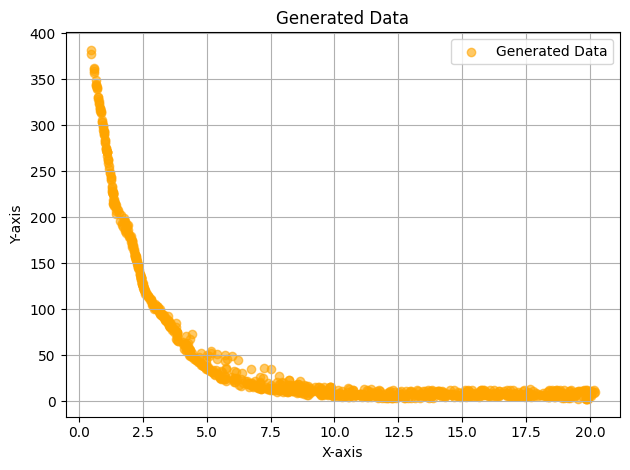

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the Generator class
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 16),  # Input size is 2 (latent space)
            nn.LeakyReLU(0.2),
            nn.Linear(16, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 2)  # Output size should be 2 for 2D data
        )

    def forward(self, input):
        return self.main(input)

# Function to sample noise
def sample_Z(m, n):
    return torch.Tensor(np.random.uniform(-1., 1., size=[m, n]))

# Function to generate new data
def generate_data(generator, num_samples, noise_dim, device):
    generator.to(device)  # Ensure the model is on the correct device
    generator.eval()  # Ensure the model is in evaluation mode
    with torch.no_grad():
        noise = sample_Z(num_samples, noise_dim).to(device)  # Sample noise and move to the same device as the model
        generated_data = generator(noise)
    return generated_data.cpu().numpy()

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator()

# Load the checkpoint
checkpoint_path = '../plots/checkpoint/checkpoint_12000.tar'  # Adjust this path if needed
checkpoint = torch.load(checkpoint_path, map_location=device)
generator.load_state_dict(checkpoint['generator_state_dict'])

# Specify how many samples you want and the noise dimension
num_samples = 1000  # Number of samples you want to generate
noise_dim = 2       # Dimension of the latent space

# Generate new data using the loaded generator
new_data = generate_data(generator, num_samples, noise_dim, device)

# Save the generated data to a file
np.savetxt('generated_data.txt', new_data)

# Optionally, plot some of the generated data
plt.figure()
plt.scatter(new_data[:, 0], new_data[:, 1], color='orange', label='Generated Data', alpha=0.6)
plt.title('Generated Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('generated_data_plot.png', dpi=300)
plt.show()
